# 1. Annual Returns

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import scipy.stats as stats

data_path = pathlib.Path(r"Preprocessed Data")

from src.annual_calculations import *
from src.long_term_simulations import *
from src.trade_simulations import *

df = pd.read_csv(data_path / "SP500_whole.csv").set_index("Date")
df_gold = pd.read_csv(data_path / "Gold_prices.csv")

## 1.1. Annual Returns of SP500 Index

In [2]:
annual_returns_stocks = compute_annual_returns_stocks(df)
annual_returns_stocks.head(10)

100%|██████████| 73/73 [00:00<00:00, 1661.92it/s]


,(%)Adjusted_Annual_Return_Without_Dividends,(%)Adjusted_Annual_Return_With_Dividends
Period,,
"(1950, 1951)",12.466000,19.906000
"(1951, 1952)",7.265190,13.285190
"(1952, 1953)",0.171181,5.581181
"(1953, 1954)",19.783523,25.623523
"(1954, 1955)",36.757653,41.157653
"(1955, 1956)",13.469018,17.079018
"(1956, 1957)",-7.802313,-4.052313
"(1957, 1958)",1.127990,5.567990
"(1958, 1959)",22.995720,26.265720


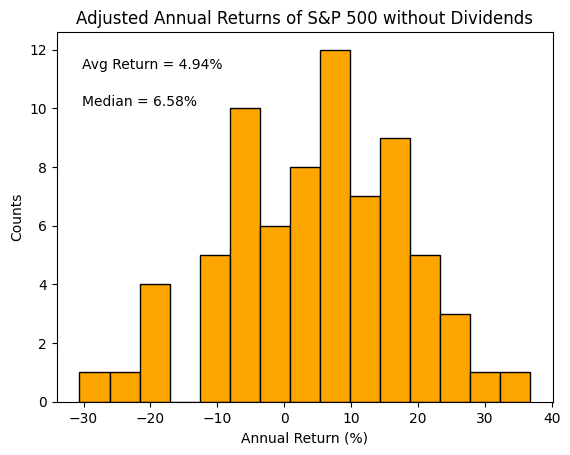

In [3]:
nominal_returns = plt.hist(
    annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"],
    bins=15,
    edgecolor="black",
    color="orange",
)
plt.xlabel("Annual Return (%)")
plt.title("Adjusted Annual Returns of S&P 500 without Dividends")
plt.text(
    0.05,
    0.9,
    f'Avg Return = {annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.8,
    f'Median = {annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

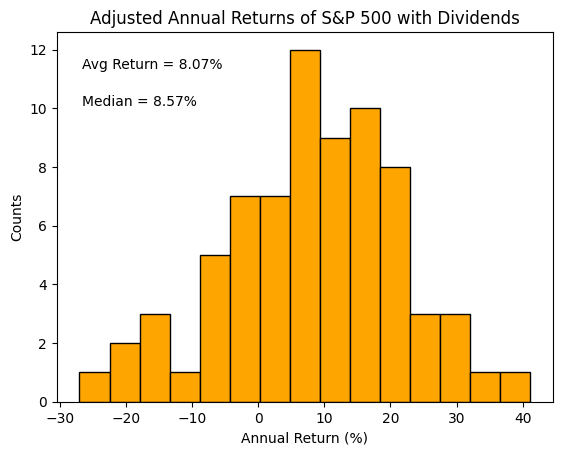

In [4]:
real_returns = plt.hist(
    annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"],
    bins=15,
    edgecolor="black",
    color="orange",
)
plt.xlabel("Annual Return (%)")
plt.title("Adjusted Annual Returns of S&P 500 with Dividends")
plt.text(
    0.05,
    0.9,
    f'Avg Return = {annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.05,
    0.8,
    f'Median = {annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

## 1.2. Annual Returns of Gold

In [5]:
annual_returns_gold = compute_annual_returns_commodity(df_gold)
annual_returns_gold.head(10)

100%|██████████| 73/73 [00:00<00:00, 1564.58it/s]


,(%)Adjusted_Annual_Return
Period,
"(1950, 1951)",-4.096305
"(1951, 1952)",-6.213021
"(1952, 1953)",-6.351333
"(1953, 1954)",-5.195711
"(1954, 1955)",-0.123411
"(1955, 1956)",-1.540567
"(1956, 1957)",-3.099652
"(1957, 1958)",-2.664618
"(1958, 1959)",-1.027397


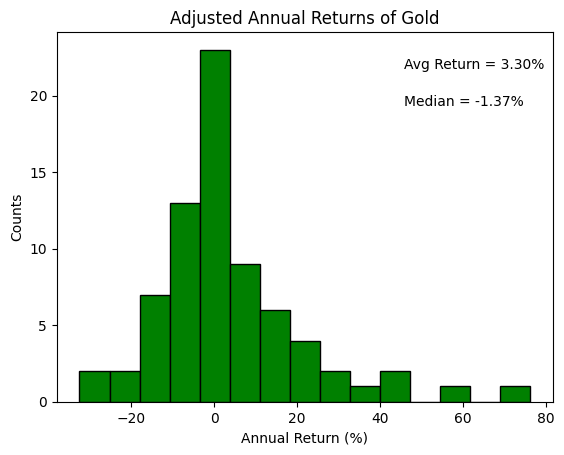

In [6]:
real_returns_gold = plt.hist(
    annual_returns_gold["(%)Adjusted_Annual_Return"],
    bins=15,
    edgecolor="black",
    color="green",
)
plt.xlabel("Annual Return (%)")
plt.title("Adjusted Annual Returns of Gold")
plt.text(
    0.7,
    0.9,
    f'Avg Return = {annual_returns_gold["(%)Adjusted_Annual_Return"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.7,
    0.8,
    f'Median = {annual_returns_gold["(%)Adjusted_Annual_Return"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

## 1.3. Statistical Comparison

In [7]:
p_critical = 0.05

In [8]:
result = stats.wilcoxon(
    annual_returns_gold["(%)Adjusted_Annual_Return"],
    annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"],
)

print(result)
print()

if result.pvalue < p_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(1089.0), pvalue=np.float64(0.15054448663037195))

Fail to reject the null hypothesis


# 2. ETF Simulations

## 2.1. Long Term Investment - Stocks

In [9]:
# a single sample is enough because of the low variation between data points
long_term_investment_results = simulate_twenty_years_of_investment(df, sample_size=1)
long_term_investment_results.tail(10)

100%|██████████| 54/54 [00:00<00:00, 83.13it/s]


,Period,Capital Invested,Portfolio Value,Capital Gained,Capital Invested Adjusted,Portfolio Value Adjusted,% Change w.o. Dividend,% Change with Dividend,Real Returns
44,"(1994, 2014)",914.352002,5357.129972,4442.777970,1879.912651,6896.144920,157.981772,266.833263,2969.919325
45,"(1995, 2015)",1103.659991,5826.724094,4723.064103,2206.595796,7491.151187,140.293414,239.489054,3095.708565
46,"(1996, 2016)",1341.339990,5828.954772,4487.614782,2604.883970,7400.343829,100.559121,184.094951,2619.448436
47,"(1997, 2017)",1789.484009,6992.978654,5203.494645,3397.232258,8693.433684,80.295672,155.897537,2727.830468
48,"(1998, 2018)",2209.303979,7815.595833,5606.291853,4129.907500,9483.918957,61.245053,129.639985,2529.364039
49,"(1999, 2019)",2667.006006,8253.988661,5586.982655,4877.771489,9835.707255,40.394489,101.643461,1970.350890
50,"(2000, 2020)",2903.751978,9283.426063,6379.674085,5138.055909,10929.906960,47.280453,112.724563,2429.296130
51,"(2001, 2021)",2370.984008,12004.271019,9633.287010,4079.270623,13497.053061,129.687597,230.869273,5290.308039
52,"(2002, 2022)",1934.650025,11255.086948,9320.436923,3276.752988,11716.518596,148.958014,257.564902,4880.986182
53,"(2003, 2023)",1964.271997,12274.851312,10310.579315,3252.791726,12274.851312,163.279414,277.363580,5311.139258


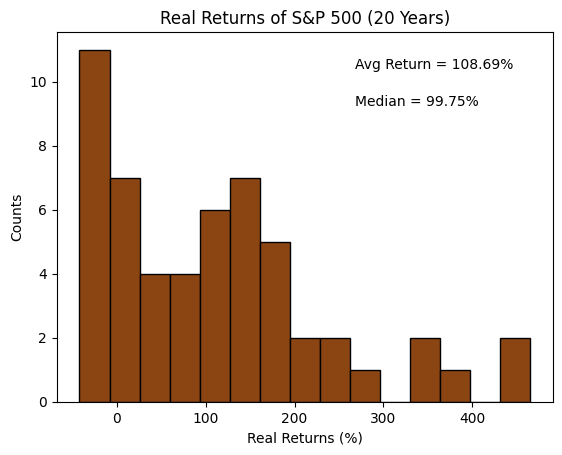

In [10]:
twenty_sp = plt.hist(
    long_term_investment_results["% Change w.o. Dividend"],
    bins=15,
    edgecolor="black",
    color="saddlebrown",
)
plt.xlabel("Real Returns (%)")
plt.title("Real Returns of S&P 500 (20 Years)")
plt.text(
    0.6,
    0.9,
    f'Avg Return = {long_term_investment_results["% Change w.o. Dividend"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.6,
    0.8,
    f'Median = {long_term_investment_results["% Change w.o. Dividend"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

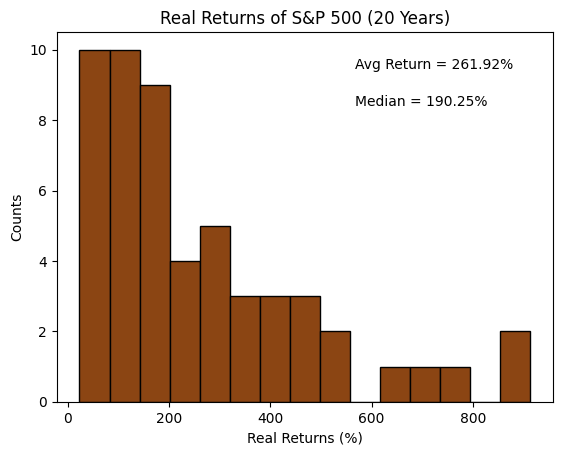

In [11]:
plt.hist(
    long_term_investment_results["% Change with Dividend"],
    bins=15,
    edgecolor="black",
    color="saddlebrown",
)
plt.xlabel("Real Returns (%)")
plt.title("Real Returns of S&P 500 (20 Years)")
plt.text(
    0.6,
    0.9,
    f'Avg Return = {long_term_investment_results["% Change with Dividend"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.6,
    0.8,
    f'Median = {long_term_investment_results["% Change with Dividend"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

## 2.2. Long Term Investment - Gold

In [12]:
long_term_investment_results_gold = simulate_twenty_years_of_investment_gold(
    df_gold, sample_size=30
)
long_term_investment_results_gold.tail(10)

100%|██████████| 54/54 [00:00<00:00, 74.97it/s]


,Period,Capital Invested,Portfolio Value,Capital Gained,Capital Invested Adjusted,Portfolio Value Adjusted,% Change
1610,"(2003, 2023)",668.7,3886.006693,3217.306693,1107.352663,3886.006693,250.927651
1611,"(2003, 2023)",756.4,3886.006693,3129.606693,1252.581957,3886.006693,210.239715
1612,"(2003, 2023)",756.6,3886.006693,3129.406693,1252.913152,3886.006693,210.157706
1613,"(2003, 2023)",707.9,3886.006693,3178.106693,1172.267011,3886.006693,231.495014
1614,"(2003, 2023)",751.6,3886.006693,3134.406693,1244.633261,3886.006693,212.221022
1615,"(2003, 2023)",702.5,3886.006693,3183.506693,1163.324728,3886.006693,234.043161
1616,"(2003, 2023)",704.5,3886.006693,3181.506693,1166.636685,3886.006693,233.094848
1617,"(2003, 2023)",723.9,3886.006693,3162.106693,1198.762663,3886.006693,224.168145
1618,"(2003, 2023)",685.0,3886.006693,3201.006693,1134.345109,3886.006693,242.577110
1619,"(2003, 2023)",665.5,3886.006693,3220.506693,1102.053533,3886.006693,252.615057


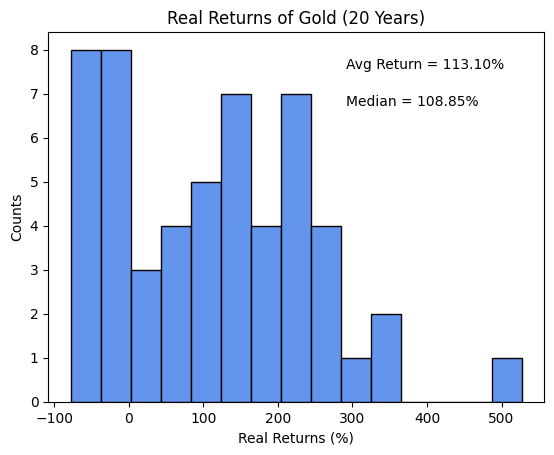

In [13]:
mean_returns_gold = pd.DataFrame(
    long_term_investment_results_gold.groupby("Period")["% Change"].mean()
)
twenty_gold = plt.hist(
    mean_returns_gold["% Change"], bins=15, edgecolor="black", color="cornflowerblue"
)
plt.xlabel("Real Returns (%)")
plt.title("Real Returns of Gold (20 Years)")
plt.text(
    0.6,
    0.9,
    f'Avg Return = {mean_returns_gold["% Change"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.6,
    0.8,
    f'Median = {mean_returns_gold["% Change"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

# 2.3. Statistical Comparison

In [14]:
test_results = stats.wilcoxon(
    mean_returns_gold["% Change"].values,
    long_term_investment_results["% Change w.o. Dividend"].values,
)
print(test_results)
if test_results.pvalue <= p_critical:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(696.0), pvalue=np.float64(0.6888802341135647))
Fail to reject the null hypothesis


# 3. Trading

<Figure size 640x480 with 0 Axes>

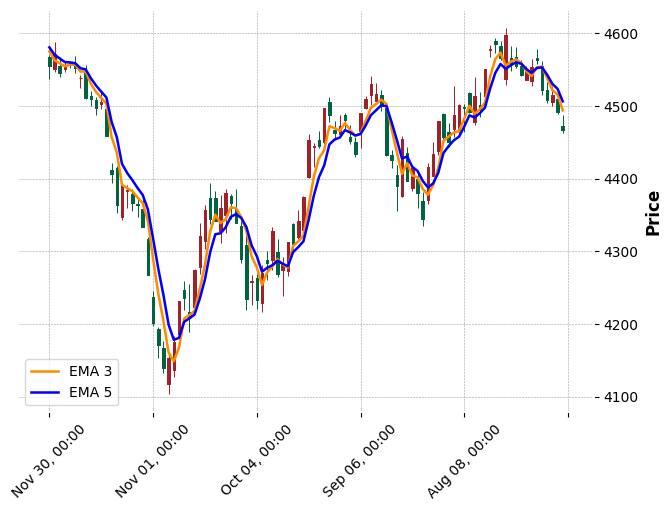

In [15]:
# display simulation
plot_df = pd.read_csv(r"Raw Data\SPX500 (2014-2023).csv")
display_EMA(plot_df)

## 3.1. Trading Stocks

### 3.1.1. Trading Simulations

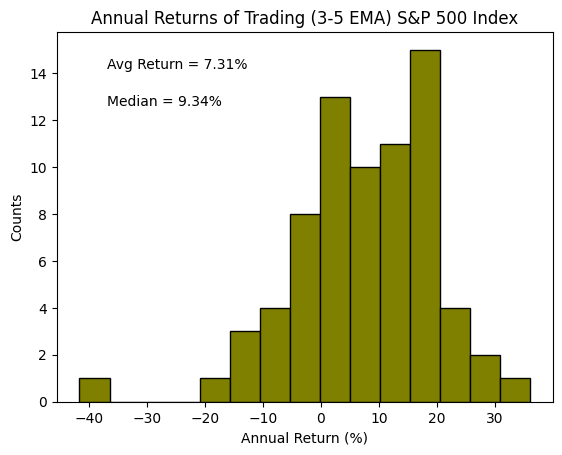

In [16]:
trade_results_35 = simulate_trade_EMA(df, verbose=False, EMA1=3, EMA2=5)
plt.hist(
    x=trade_results_35["(%)Annual_Return_Without_Dividends"],
    bins=15,
    edgecolor="black",
    color="olive",
)
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (3-5 EMA) S&P 500 Index")
plt.text(
    0.1,
    0.9,
    f'Avg Return = {trade_results_35["(%)Annual_Return_Without_Dividends"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.1,
    0.8,
    f'Median = {trade_results_35["(%)Annual_Return_Without_Dividends"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

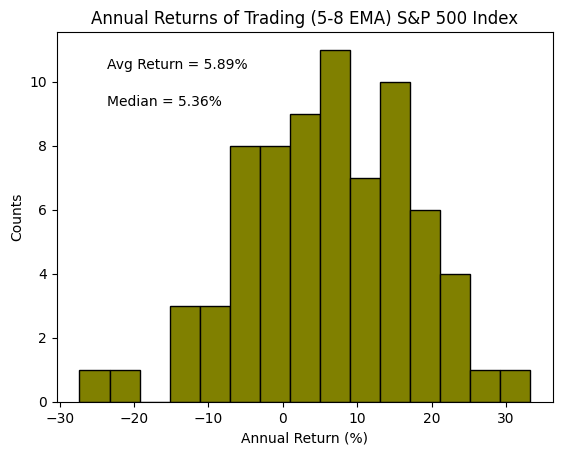

In [17]:
trade_results_58 = simulate_trade_EMA(df, verbose=False, EMA1=5, EMA2=8)
plt.hist(
    x=trade_results_58["(%)Annual_Return_Without_Dividends"],
    bins=15,
    edgecolor="black",
    color="olive",
)
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (5-8 EMA) S&P 500 Index")
plt.text(
    0.1,
    0.9,
    f'Avg Return = {trade_results_58["(%)Annual_Return_Without_Dividends"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.1,
    0.8,
    f'Median = {trade_results_58["(%)Annual_Return_Without_Dividends"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

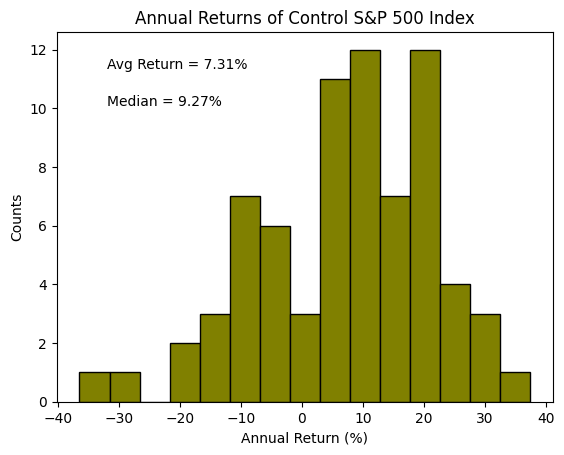

In [18]:
control_result = simulate_control_group(df)
plt.hist(
    x=control_result["(%)Annual_Return_Without_Dividends"],
    bins=15,
    edgecolor="black",
    color="olive",
)
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Control S&P 500 Index")
plt.text(
    0.1,
    0.9,
    f'Avg Return = {control_result["(%)Annual_Return_Without_Dividends"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.1,
    0.8,
    f'Median = {control_result["(%)Annual_Return_Without_Dividends"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

### 3.1.2. Statistical Comparison

In [19]:
corrected_pval = 0.05 / 3

df1 = trade_results_35["(%)Annual_Return_Without_Dividends"].to_frame("3-5 EMA")
df2 = trade_results_58["(%)Annual_Return_Without_Dividends"].to_frame("5-8 EMA")
df3 = control_result["(%)Annual_Return_Without_Dividends"].to_frame("Control")

# Sonra concat fonksiyonu ile DataFrame'leri birleştiriyoruz
joinDF = pd.concat([df1, df2, df3], axis=1)
joinDF.head()

,3-5 EMA,5-8 EMA,Control
Period,,,
1950,4.364200,7.421474,16.918224
1951,11.512577,11.805429,10.367898
1952,17.010826,13.438493,7.597164
1953,0.577065,1.583874,-5.254217
1954,36.088616,33.261157,37.407386


In [20]:
result = stats.wilcoxon(joinDF["3-5 EMA"], joinDF["Control"])

print(result)
print()

if result.pvalue < corrected_pval:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(1274.0), pvalue=np.float64(0.6740741905883685))

Fail to reject the null hypothesis


In [21]:
result = stats.ttest_rel(joinDF["5-8 EMA"], joinDF["Control"])

print(result)
print()

if result.pvalue < corrected_pval:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

TtestResult(statistic=np.float64(-1.1341595679430996), pvalue=np.float64(0.2604896716412202), df=np.int64(72))

Fail to reject the null hypothesis


In [22]:
result = stats.wilcoxon(joinDF["5-8 EMA"], joinDF["3-5 EMA"])

print(result)
print()

if result.pvalue < corrected_pval:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(901.0), pvalue=np.float64(0.013467877502082545))

Reject the null hypothesis


## 3.2. Trading Gold

### 3.2.1. Trading Simulations

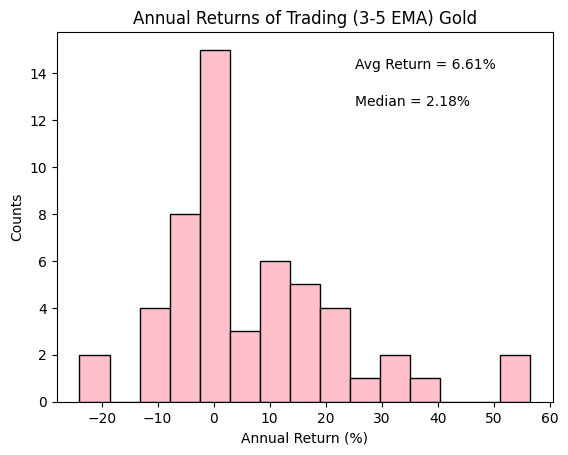

In [23]:
trade_results_35_gold = simulate_trade_EMA_gold(
    df_gold.set_index("Date"), verbose=False, EMA1=3, EMA2=5
)
plt.hist(
    x=trade_results_35_gold["(%)Annual_Return"],
    bins=15,
    edgecolor="black",
    color="pink",
)
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (3-5 EMA) Gold")
plt.text(
    0.6,
    0.9,
    f'Avg Return = {trade_results_35_gold["(%)Annual_Return"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.6,
    0.8,
    f'Median = {trade_results_35_gold["(%)Annual_Return"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

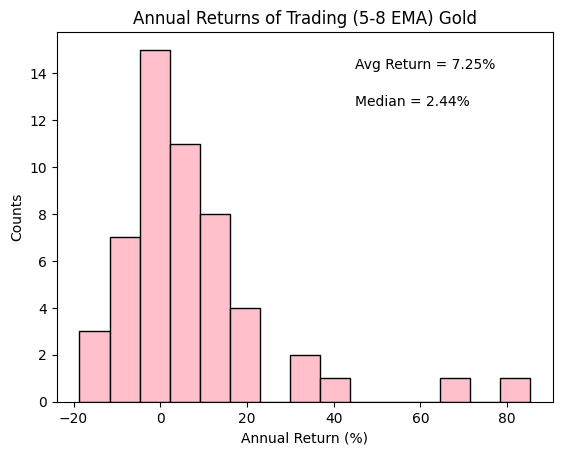

In [24]:
trade_results_58_gold = simulate_trade_EMA_gold(
    df_gold.set_index("Date"), verbose=False, EMA1=5, EMA2=8
)
plt.hist(
    x=trade_results_58_gold["(%)Annual_Return"],
    bins=15,
    edgecolor="black",
    color="pink",
)
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (5-8 EMA) Gold")
plt.text(
    0.6,
    0.9,
    f'Avg Return = {trade_results_58_gold["(%)Annual_Return"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.6,
    0.8,
    f'Median = {trade_results_58_gold["(%)Annual_Return"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

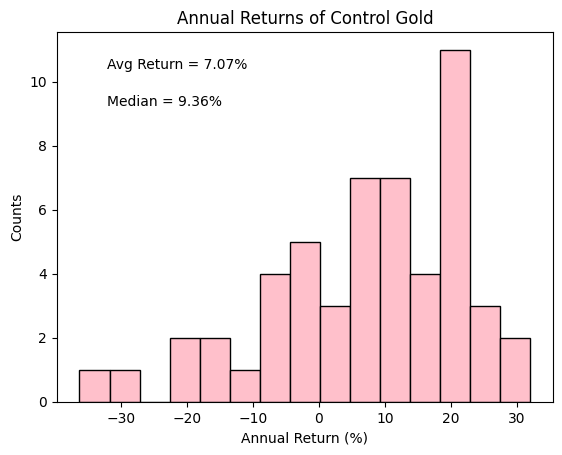

In [25]:
control_result = simulate_control_group_gold(df)
plt.hist(x=control_result["(%)Annual_Return"], bins=15, edgecolor="black", color="pink")
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Control Gold")
plt.text(
    0.1,
    0.9,
    f'Avg Return = {control_result["(%)Annual_Return"].mean():.2f}%',
    transform=plt.gca().transAxes,
)
plt.text(
    0.1,
    0.8,
    f'Median = {control_result["(%)Annual_Return"].median():.2f}%',
    transform=plt.gca().transAxes,
)
plt.ylabel("Counts")
plt.show()

### 3.2.2. Statistical Comparison

In [26]:
result = stats.wilcoxon(
    x=control_result["(%)Annual_Return"], y=trade_results_58_gold["(%)Annual_Return"]
)

print(result)
print()

if result.pvalue < corrected_pval:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(608.0), pvalue=np.float64(0.34126325404775515))

Fail to reject the null hypothesis


In [27]:
result = stats.wilcoxon(
    x=control_result["(%)Annual_Return"], y=trade_results_35_gold["(%)Annual_Return"]
)

print(result)
print()

if result.pvalue < corrected_pval:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(651.0), pvalue=np.float64(0.5679973936337135))

Fail to reject the null hypothesis


In [28]:
result = stats.wilcoxon(
    x=trade_results_58_gold["(%)Annual_Return"],
    y=trade_results_35_gold["(%)Annual_Return"],
)

print(result)
print()

if result.pvalue < corrected_pval:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

WilcoxonResult(statistic=np.float64(697.0), pvalue=np.float64(0.8699073712236178))

Fail to reject the null hypothesis
